# Object analysis with python

### Introduction

It can be useful to identify objects in observational or model data, for tracking, classification, and quantification.  This notebook will illustrate how to work with these objects in python.


In [2]:
%pylab inline
import xarray as xr

dataset_ctl = xr.open_dataset("/oasis/scratch/snesbitt/temp_project/WRFV3/test/em_q_250m/wrfout_d01_0001-01-01_00:00:00")


Populating the interactive namespace from numpy and matplotlib


Let's analyze the properties of the updrafts at time=5 (when the first cell becomes mature).

In [3]:
dataset_t5_w=dataset_ctl['W'].isel(Time=20)
dataset_t5_w

<xarray.DataArray 'W' (bottom_top_stag: 81, south_north: 503, west_east: 503)>
[20493729 values with dtype=float32]
Coordinates:
    XLAT             (south_north, west_east) float32 0.0 0.0 0.0 0.0 0.0 ...
    XLONG            (south_north, west_east) float32 0.0 0.0 0.0 0.0 0.0 ...
    XTIME            datetime64[ns] 2001-01-01T01:40:00.000480
    Time             int64 20
  * bottom_top_stag  (bottom_top_stag) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 ...
  * south_north      (south_north) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 ...
  * west_east        (west_east) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 ...
Attributes:
    FieldType: 104
    MemoryOrder: XYZ
    description: z-wind component
    units: m s-1
    stagger: Z

We can use the function `where` in `numpy` to create an array which thresholds on a value.  Let's find the points where w > 1 m/s.

In [4]:
updraft_pts=np.where(dataset_t5_w.values >= 1.,1.,0.)
updraft_pts

array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       ..., 
       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0., 

Let's take a look.

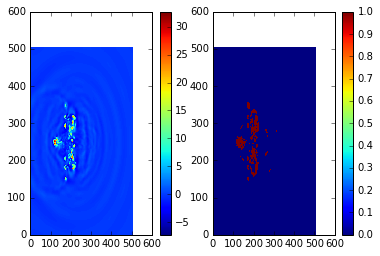

In [5]:
fig = plt.figure()
ax0 = fig.add_subplot(121)

plt.pcolormesh(dataset_t5_w.values[20,:,:])
plt.colorbar()

ax1 = fig.add_subplot(122)

plt.pcolormesh(updraft_pts[20,:,:])
plt.colorbar()


Now let's group the objects into regions in 3-D.  We could do this in 2-D as well by looping over each height also.  `s` is set up to be the filter to search for connected points.

In [7]:
from scipy.ndimage import label, generate_binary_structure
s = generate_binary_structure(3,3)
updraft_labels,nfeat=label(updraft_pts,s)
updraft_labels

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ..., 
       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, 

Let's take a look.

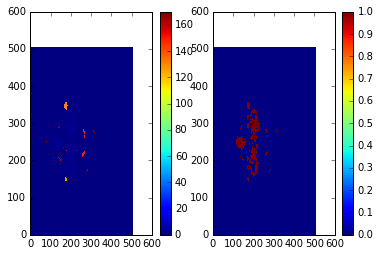

In [8]:
fig = plt.figure()
ax0 = fig.add_subplot(121)

plt.pcolormesh(updraft_labels[20,:,:])
plt.colorbar()

ax1 = fig.add_subplot(122)

plt.pcolormesh(updraft_pts[20,:,:])
plt.colorbar()


In [9]:
print(nfeat)

444


In [11]:
for i in np.arange(1,nfeat):
    index_i_w=np.where(updraft_labels == i)
    print(i,np.shape(index_i_w))

(1, (3, 658))
(2, (3, 398))
(3, (3, 367473))
(4, (3, 70))
(5, (3, 391))
(6, (3, 45))
(7, (3, 2))
(8, (3, 2))
(9, (3, 4))
(10, (3, 173))
(11, (3, 55))
(12, (3, 4))
(13, (3, 217))
(14, (3, 18))
(15, (3, 63))
(16, (3, 2))
(17, (3, 180))
(18, (3, 68))
(19, (3, 4))
(20, (3, 6))
(21, (3, 9))
(22, (3, 10))
(23, (3, 14))
(24, (3, 4))
(25, (3, 11))
(26, (3, 4))
(27, (3, 6))
(28, (3, 4))
(29, (3, 113))
(30, (3, 57))
(31, (3, 8))
(32, (3, 8))
(33, (3, 51))
(34, (3, 9))
(35, (3, 1))
(36, (3, 5))
(37, (3, 12))
(38, (3, 391))
(39, (3, 1))
(40, (3, 111))
(41, (3, 3))
(42, (3, 55))
(43, (3, 13))
(44, (3, 162))
(45, (3, 3))
(46, (3, 180))
(47, (3, 3))
(48, (3, 12))
(49, (3, 220))
(50, (3, 4))
(51, (3, 23))
(52, (3, 4))
(53, (3, 179))
(54, (3, 687))
(55, (3, 246))
(56, (3, 5))
(57, (3, 55))
(58, (3, 383))
(59, (3, 6))
(60, (3, 1))
(61, (3, 13))
(62, (3, 3))
(63, (3, 2))
(64, (3, 4))
(65, (3, 3))
(66, (3, 3))
(67, (3, 11))
(68, (3, 1))
(69, (3, 12))
(70, (3, 63))
(71, (3, 2))
(72, (3, 9))
(73, (3, 427))


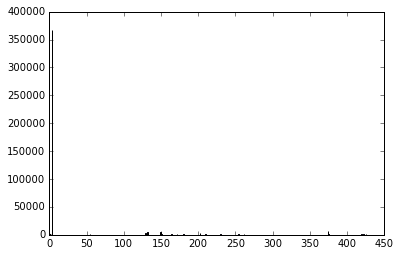

In [18]:
hist_w=plt.hist(updraft_labels.ravel(),bins=np.arange(1,nfeat))
